## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入

# https://medium.com/unalai/%E8%AA%8D%E8%AD%98-html-pre-tag-3be6d5f32e54 
# 說明 HTML tag <pre> 的用途: 和 <p> 最大的不同在於對於 white-space 的定義 
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [92]:
import requests
response = requests.get(target_url)
data = response.text # 查看 HTML code

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [98]:
# 資料
my_data = {'key1': 'value1', 'key2': 'value2'}

# 將資料加入 POST 請求中
r = requests.post('http://httpbin.org/post', data = my_data)
r.text

'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "key1": "value1", \n    "key2": "value2"\n  }, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Content-Length": "23", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.25.0", \n    "X-Amzn-Trace-Id": "Root=1-61545eef-787565272f1f501226ec03f7"\n  }, \n  "json": null, \n  "origin": "1.200.114.39", \n  "url": "http://httpbin.org/post"\n}\n'

In [18]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [19]:
list1 = []
for i in data:
    list1.append(i.split('\t'))
print(list1[0:5])

[['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'], ['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'], ['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'], ['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']]


## 將 txt 轉成 pandas dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(list1)
df.columns = ['Picture_no','url']
df.head()

,Picture_no,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [56]:
first_link = df.iloc[0]
first_link
response = requests.get(first_link[1])
BytesIO(response.content).getvalue() # ByteIO 可以視為是 二進位的 貯存物件，以下的內容為 二進位的 byte
# 表示照片的內容被二進位的 byte 給存取起來了。


b'\xff\xd8\xff\xe1\x00\x16Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\xff\xed\x00\x8aPhotoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00m\x1c\x01Z\x00\x03\x1b%G\x1c\x01\x00\x00\x02\x00\x04\x1c\x02\x00\x00\x02\x00\x04\x1c\x02\xe6\x00Khttps://flickr.com/e/5jtlPhS%2FBjBfrcGsoxJdxwwZ3v9%2FnBJt%2FwP0ZA%2FlgCk%3D\x1c\x02\x00\x00\x02\x00\x04\x00\xff\xe0\x00\x10JFIF\x00\x01\x02\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x

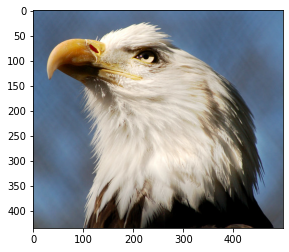

In [71]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0]

response = requests.get(first_link[1])
img = Image.open(BytesIO(response.content)) #什麼是 response content 以及 BytesIO ?
# 為什麼 使用 Image.open 可以將 BytesIO 當作是 input ?

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [88]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for i in url_list:
        try:
            img_list.append(Image.open(BytesIO(requests.get(i).content)))
        except:
            continue
    return img_list

Total images that we got: 5 


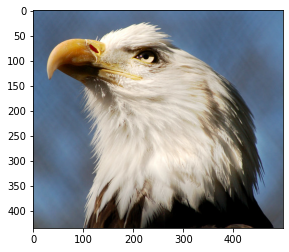

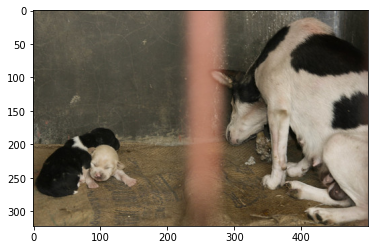

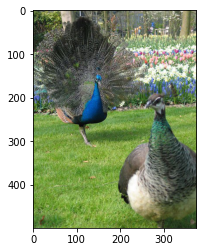

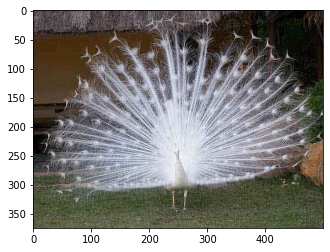

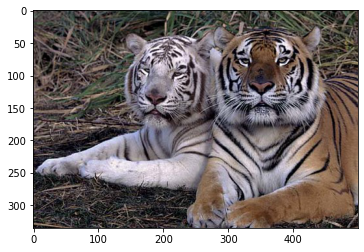

In [91]:
result = img2arr_fromURLs(df[0:10]['url'].values) # .values 使其變成 array 
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
        plt.imshow(im_get)
        plt.show()
